# Imports

In [1]:
%load_ext autoreload
%autoreload 2

from dataloader.load_regression_data_from_arbitrary_gp import RegressionDataGeneratorArbitraryGP

2023-02-19 15:05:47.169889: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-19 15:05:47.830038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 15:05:47.830101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 15:05:47.830108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make su

# DataGenerator

In [2]:
data_generator = RegressionDataGeneratorArbitraryGP(
    iterations=100,
    batch_size=32,
    min_num_context=3,
    max_num_context=20,
    min_num_target=2,
    max_num_target=10,
    min_x_val_uniform=-2,
    max_x_val_uniform=2,
    kernel_length_scale=0.4
)

In [3]:
(context_x, context_y, target_x), target_y = next(iter(data_generator.train_ds))

(<Figure size 800x500 with 1 Axes>, <AxesSubplot: >)

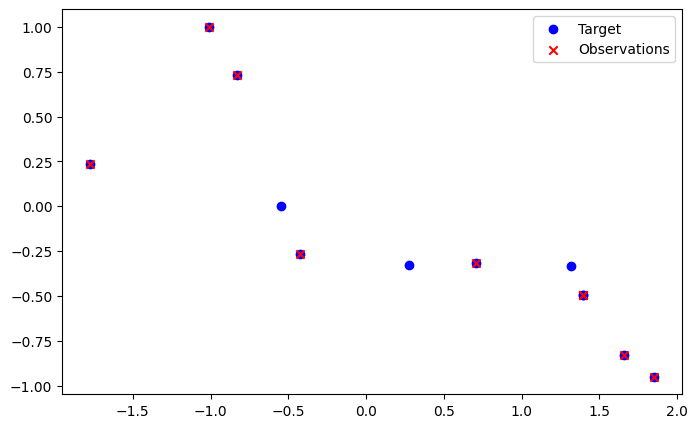

In [4]:
data_generator.plot_first_elt_of_random_batch()

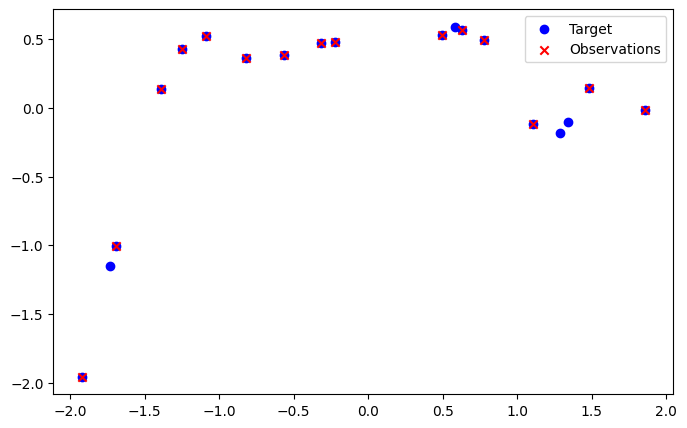

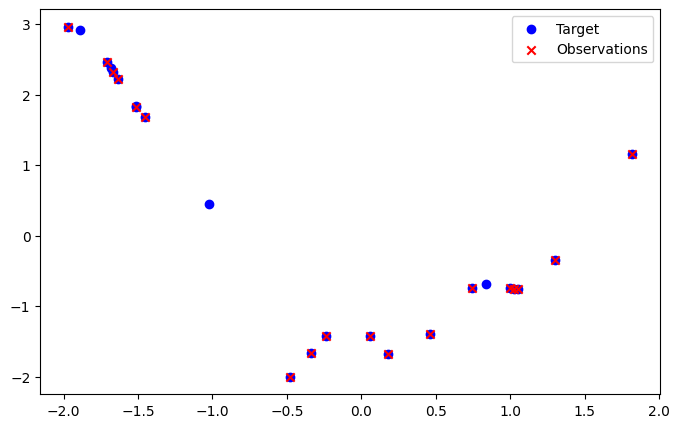

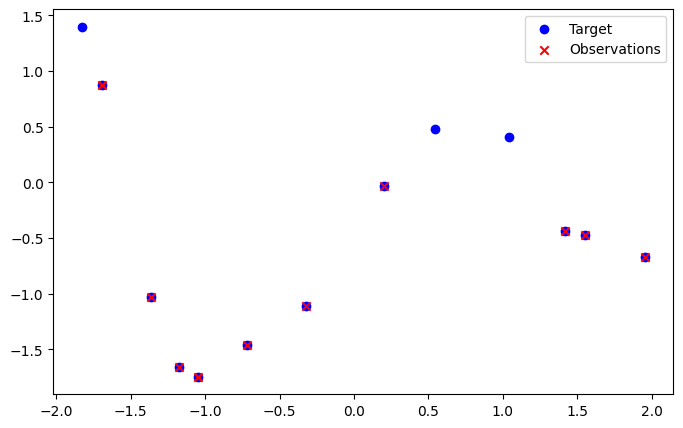

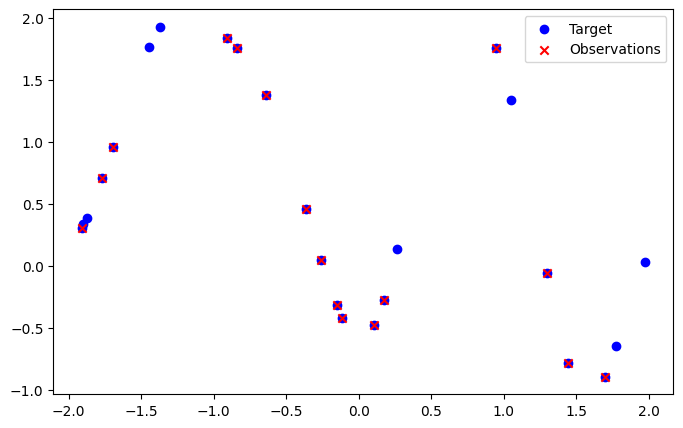

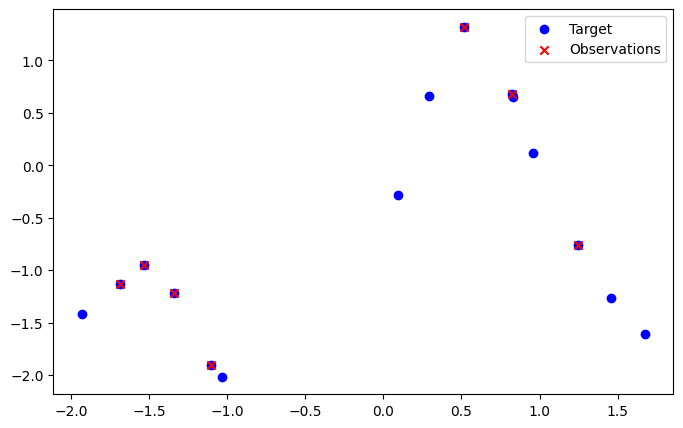

In [5]:
for (context_x, context_y, target_x), target_y in data_generator.train_ds.take(5):
    RegressionDataGeneratorArbitraryGP.plot_first_elt_of_batch(context_x, context_y, target_x, target_y)

In [6]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
from model import ConditionalNeuralProcess

encoder_dims = [500, 500, 500, 500]
decoder_dims = [500, 500, 500, 2]

def loss(target_y, pred_y):
    # Get the distribution
    mu, sigma = tf.split(pred_y, num_or_size_splits=2, axis=-1)
    dist = tfd.MultivariateNormalDiag(loc=mu, scale_diag=sigma)
    return -dist.log_prob(target_y)

model = ConditionalNeuralProcess(encoder_dims, decoder_dims)
model.compile(loss=loss, optimizer='adam')

In [8]:
model.fit(data_generator.train_ds, validation_data=data_generator.test_ds, epochs=2)

Epoch 1/2
100/100 [==============================] - 12s 116ms/step - loss: 1.0300 - val_loss: 1.1668
Epoch 2/2
100/100 [==============================] - 12s 116ms/step - loss: 0.9251 - val_loss: 1.0865


In [9]:
model.predict(data_generator.test_ds.take(1))

1/1 [==============================] - 0s 104ms/step


array([[[ 1.3941153 ,  0.7875757 ],
        [-0.49895424,  0.69788474],
        [ 1.3803025 ,  0.7715511 ],
        ...,
        [ 1.3975668 ,  0.8218978 ],
        [ 1.3539621 ,  0.7601022 ],
        [-0.04027305,  0.74551547]],

       [[ 0.44205922,  0.53086936],
        [-0.24754624,  0.5269941 ],
        [ 0.52544665,  0.6034053 ],
        ...,
        [ 0.5575924 ,  0.59626424],
        [ 0.80741906,  0.5698238 ],
        [ 0.58578765,  0.5342109 ]],

       [[-0.6423248 ,  0.5933076 ],
        [-0.7316416 ,  0.60098654],
        [ 0.5357233 ,  0.7690905 ],
        ...,
        [-1.2741163 ,  0.52510315],
        [ 0.10835146,  0.6401371 ],
        [ 0.5371267 ,  0.7640603 ]],

       ...,

       [[-0.18762805,  0.5339582 ],
        [-0.35261032,  0.5655409 ],
        [-0.99517065,  0.5005139 ],
        ...,
        [-0.98342675,  0.49990493],
        [-0.17393976,  0.5335402 ],
        [-0.5339323 ,  0.52999365]],

       [[ 0.4548825 ,  0.46251586],
        [ 0.08926317,  0.46